In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':16})

In [37]:
data = np.loadtxt("../data/recombination.txt")
data_saha = np.loadtxt("../data/recombination_saha.txt")

x     = data[:,0]
Xe    = data[:,1]
ne    = data[:,2]
tau   = data[:,3]
dtau  = data[:,4]
ddtau = data[:,5]
g     = data[:,6]
dg    = data[:,7]
ddg   = data[:,8]

Xe_saha = data_saha[:,1]
ne_saha = data_saha[:,2]

saha_idx = np.argmin(np.abs(Xe - 0.99))  # Index of end of Saha domain, and begining of Peebles, at Xe = 0.99.
rec_idx  = np.argmin(np.abs(Xe - 0.5))  # Index of defined recombination point, at Xe = 0.5.
rec_saha_idx  = np.argmin(np.abs(Xe_saha - 0.5))  # The above, but using only the Saha approximation.
LS_idx   = np.argmin(np.abs(tau - 1.0))  # Index of defined last scattering surface, at tau=1.0.

x[saha_idx], x[rec_saha_idx], x[rec_idx], x[LS_idx]

(-7.37053, -8.63415, -7.16515, -6.98623)

In [43]:
np.trapz(g, x)

0.9999910828977224

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(13.4, 5), sharey=True)
ax[0].semilogy(x, Xe, c="blue", label="Xe, Peebles", lw=2)
ax[0].semilogy(x, Xe_saha, c="red", label="Xe, Saha", lw=2)
ax[0].set_ylim(1e-5, 3)
ax[0].set_xlim(-12, 0)
ax[0].legend(loc=1)
ax[0].set_xlabel("x")
ax[0].set_ylabel("Xe")

ax[1].semilogy(x, Xe, c="blue", lw=2)
ax[1].semilogy(x, Xe_saha, c="red", lw=2)
ax[1].axvline(x=x[saha_idx], ls=":", c="k", lw=2, label="Saha limit")
ax[1].axvline(x=x[rec_saha_idx], ls="--", c="r", label="Rec. (Saha)")
ax[1].axvline(x=x[rec_idx], ls="--", c="k", label="Rec. (Peebles)")
ax[1].axvline(x=x[LS_idx], ls="-.", c="k", label="L.S.")
ax[1].legend(loc=3)
ax[1].set_ylim(1e-5, 3)
ax[1].set_xlim(-7.75, -6.4)
ax[1].set_xlabel("x")
fig.tight_layout()
fig.savefig("../m2_figs/Xe.pdf", bbox_inches="tight")
plt.close(fig)

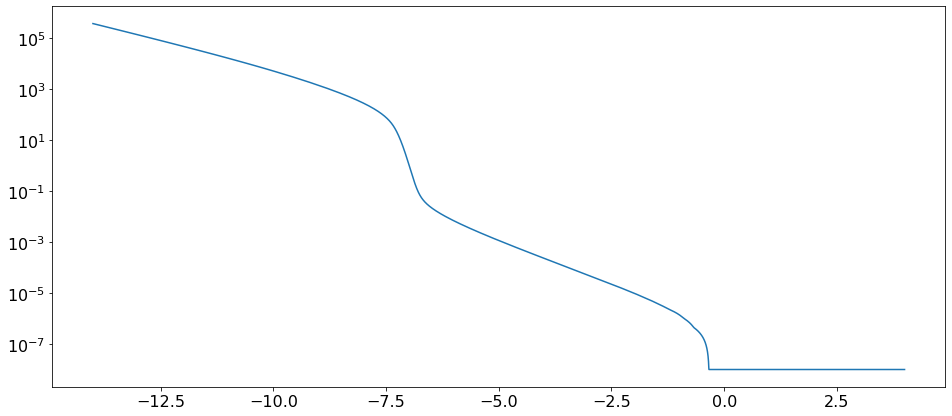

In [38]:
plt.figure(figsize=(16,7))
plt.semilogy(x, tau+1e-8)

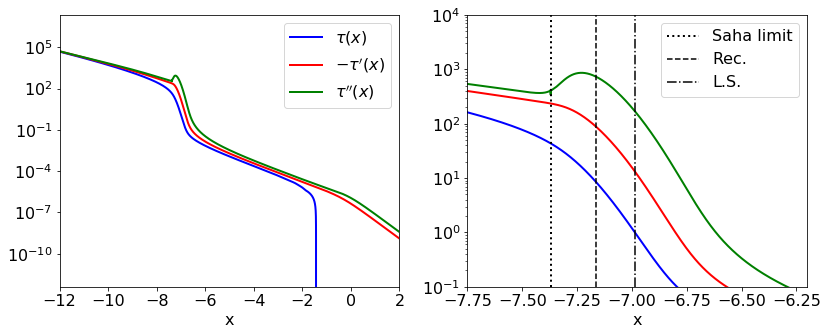

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(13.4, 5))
ax[0].semilogy(x, tau, c="blue", label=r"$\tau(x)$", lw=2)
ax[0].semilogy(x, -dtau, c="red", label=r"$-\tau'(x)$", lw=2)
ax[0].semilogy(x, ddtau, c="green", label=r"$\tau''(x)$", lw=2)
ax[0].legend(loc=1)
ax[0].set_xlabel("x")
ax[0].set_xlim(-12, 2)

ax[1].semilogy(x, tau, c="blue", lw=2)
ax[1].semilogy(x, -dtau, c="red", lw=2)
ax[1].semilogy(x, ddtau, c="green", lw=2)
ax[1].axvline(x=x[saha_idx], ls=":", c="k", lw=2, label="Saha limit")
ax[1].axvline(x=x[rec_idx], ls="--", c="k", label="Rec.")
ax[1].axvline(x=x[LS_idx], ls="-.", c="k", label="L.S.")
ax[1].legend(loc=1)
ax[1].set_xlabel("x")
ax[1].set_ylim(1e-1, 1e4)
ax[1].set_xlim(-7.75, -6.2);
# fig.tight_layout()
# fig.savefig("../m2_figs/tau.pdf", bbox_inches="tight")
# plt.close(fig)

In [9]:
fig, ax = plt.subplots(3, figsize=(8, 9), sharex=True)
ax[0].semilogy(x, Xe, c="k", lw=2, label=r"$X_e$")
ax[0].axvline(x=x[saha_idx], ls=":", c="k", lw=2, label="Saha limit")
ax[0].set_ylim(0.9893, 0.9905)
ax[0].set_xlim(-7.372, -7.368)
ax[0].legend(loc=1)

ax[1].semilogy(x, tau, c="blue", lw=2, label=r"$\tau(x)$")
ax[1].axvline(x=x[saha_idx], ls=":", c="k", lw=2)
ax[1].set_ylim(3e1, 6e1)
ax[1].set_xlim(-7.372, -7.368)
ax[1].legend(loc=1)

ax[2].semilogy(x, -dtau, c="red", lw=2, label=r"$-\tau'(x)$")
ax[2].semilogy(x, ddtau, c="green", lw=2, label=r"$\tau''(x)$")
ax[2].axvline(x=x[saha_idx], ls=":", c="k", lw=2)
ax[2].set_ylim(2e2, 5e2)
ax[2].set_xlim(-7.372, -7.368)
ax[2].legend(loc=1)
plt.xticks(rotation=45);
fig.tight_layout()
fig.savefig("../m2_figs/num_stab.pdf", bbox_inches="tight")
plt.close(fig)

In [7]:
dg_scale = np.max(g)/np.max(np.abs(dg)); dg_scaled = dg*dg_scale
ddg_scale = np.max(g)/np.max(np.abs(ddg)); ddg_scaled = ddg*ddg_scale
print(dg_scale, ddg_scale);

fig, ax = plt.subplots(1, 2, figsize=(13.4, 5), sharey=True)
ax[0].plot(x, g, lw=2, c="blue", label=r"$\tilde{g}(x)$")
ax[0].plot(x, dg_scaled, lw=2, c="red", label = r"$\tilde{g}'(x)$ (scaled)")
ax[0].plot(x, ddg_scaled, lw=2, c="green", label = r"$\tilde{g}''(x)$ (scaled)")
ax[0].set_xlim(-12, 0)
ax[0].legend(loc=1)

ax[1].plot(x, g, lw=2, c="blue")
ax[1].plot(x, dg_scaled, lw=2, c="red")
ax[1].plot(x, ddg_scaled, lw=2, c="green")
ax[1].axvline(x=x[saha_idx], ls=":", c="k", lw=2, label="Saha limit")
ax[1].axvline(x=x[rec_idx], ls="--", c="k", label="Rec.")
ax[1].axvline(x=x[LS_idx], ls="-.", c="k", label="L.S.")
ax[1].legend(loc=1)
ax[1].set_xlim(-7.4, -6.5);
fig.tight_layout()
fig.savefig("../m2_figs/g_tilde.pdf", bbox_inches="tight")
plt.close(fig)

0.0955680843867253 0.004915616658389328


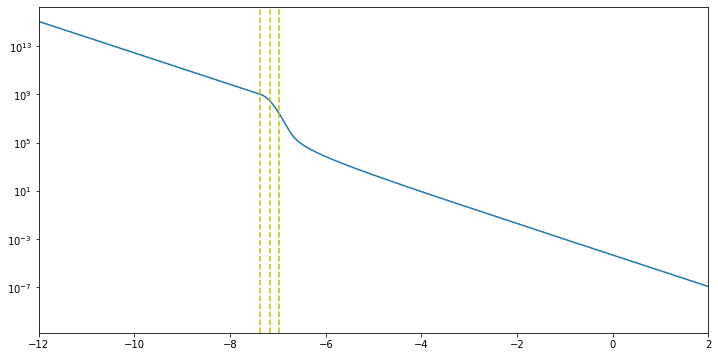

In [326]:
plt.figure(figsize=(12,6))
plt.semilogy(x, ne)
plt.axvline(x=x[saha_idx], ls="--", c="y")
plt.axvline(x=x[rec_idx], ls="--", c="y")
plt.axvline(x=x[LS_idx], ls="--", c="y")
plt.xlim(-12, 2);